In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [40]:
#Analysis of Spotify Songs
df=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\spotify_top_1000_tracks.csv")
df.head(5)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspired By,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4Tj6CV3s,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLovkQiNik,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ewm6wWRMp,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZvg9S0lU,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [41]:
#Info
df.info()
df.shape
df.columns
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


<bound method NDFrame.describe of                    track_name          artist  \
0    All The Stars (with SZA)  Kendrick Lamar   
1                     Starboy      The Weeknd   
2                    Señorita    Shawn Mendes   
3                  Heat Waves   Glass Animals   
4             Let Me Love You        DJ Snake   
..                        ...             ...   
995                      Lily           ISAEV   
996                 Apologize       Besomorph   
997                  I’m Good    Yohan Gerber   
998                      Down       Arc North   
999                Chandelier        Besomage   

                                                  album release_date  \
0    Black Panther The Album Music From And Inspired By   2018-02-09   
1                                               Starboy   2016-11-25   
2                                              Señorita   2019-06-21   
3                                             Dreamland   2020-08-07   
4                

In [42]:
#handling missing and duplicate values 
df.isna().sum()
df.drop_duplicates(inplace=True)

In [43]:
#Convert the data type
print(df["release_date"].head(10))  # Check the first few values
print(df["release_date"].dtype)  # Verify the column data type
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

0    2018-02-09
1    2016-11-25
2    2019-06-21
3    2020-08-07
4    2016-08-05
5    2013-01-01
6    2017-06-09
7    2015-10-09
8    2010-01-01
9    2017-04-20
Name: release_date, dtype: object
object


In [62]:
#Handling Missing Values
df["popularity"]=df["popularity"].fillna(0).astype(int)
df["duration_min"]=df["duration_min"].fillna(df["duration_min"].mean()).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_name    1000 non-null   object        
 1   artist        1000 non-null   object        
 2   album         1000 non-null   object        
 3   release_date  977 non-null    datetime64[ns]
 4   popularity    1000 non-null   int64         
 5   spotify_url   1000 non-null   object        
 6   id            1000 non-null   object        
 7   duration_min  1000 non-null   float64       
 8   release_year  977 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


In [45]:
#Adding a column
df["release_year"]=df["release_date"].dt.year
df.head(10)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min,release_year
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspired By,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4Tj6CV3s,3GCdLUSnKSMJhs4Tj6CV3s,3.869767,2018.0
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,3.840883,2016.0
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLovkQiNik,0TK2YIli7K1leLovkQiNik,3.182667,2019.0
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ewm6wWRMp,3USxtqRwSYz57Ewm6wWRMp,3.980083,2020.0
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZvg9S0lU,0lYBSQXN6rCTvUZvg9S0lU,3.432433,2016.0
5,La La La,Naughty Boy,La La La,2013-01-01,77,https://open.spotify.com/track/52gvlDnre9craz9dKGObp8,52gvlDnre9craz9dKGObp8,3.679650,2013.0
6,Apocalypse,Cigarettes After Sex,Cigarettes After Sex,2017-06-09,73,https://open.spotify.com/track/0yc6Gst2xkRu0eMLeRMGCX,0yc6Gst2xkRu0eMLeRMGCX,4.843600,2017.0
7,Good For You,Selena Gomez,Revival (Deluxe),2015-10-09,80,https://open.spotify.com/track/5xdVqHtFS0eLuNp4Z8Wbpa,5xdVqHtFS0eLuNp4Z8Wbpa,3.688000,2015.0
8,Baby,Justin Bieber,My World 2.0,2010-01-01,84,https://open.spotify.com/track/6epn3r7S14KUqlReYr77hA,6epn3r7S14KUqlReYr77hA,3.570667,2010.0
9,There's Nothing Holdin' Me Back,Shawn Mendes,Illuminate (Deluxe),2017-04-20,88,https://open.spotify.com/track/7JJmb5XwzOO8jgpou264Ml,7JJmb5XwzOO8jgpou264Ml,3.324000,2017.0


In [ ]:
df.iloc[df["duration_min"].idxmax()]  #highest duration song


track_name                                                   Lost Boy
artist                                                          Jaden
album                                                            SYRE
release_date                                      2017-11-17 00:00:00
popularity                                                         46
spotify_url     https://open.spotify.com/track/3Qig3auHwFlgO00p5QM6oJ
id                                             3Qig3auHwFlgO00p5QM6oJ
duration_min                                                 9.497883
release_year                                                   2017.0
Name: 710, dtype: object

In [50]:
df.iloc[710]

track_name                                                   Lost Boy
artist                                                          Jaden
album                                                            SYRE
release_date                                      2017-11-17 00:00:00
popularity                                                         46
spotify_url     https://open.spotify.com/track/3Qig3auHwFlgO00p5QM6oJ
id                                             3Qig3auHwFlgO00p5QM6oJ
duration_min                                                 9.497883
release_year                                                   2017.0
Name: 710, dtype: object

In [ ]:
# Analysis 1: Top 10 most listened song (by popularity)
top_songs=df.nlargest(10,"popularity")[["track_name","artist","popularity","release_year","album","spotify_url"]]
print("Top 10 Most Popular Songs Are:")
print(top_songs)

Top 10 Most Popular Songs Are:
                                         track_name             artist  \
611                                  That’s So True      Gracie Abrams   
606                                            APT.               ROSÉ   
0                          All The Stars (with SZA)     Kendrick Lamar   
484                                I Wanna Be Yours     Arctic Monkeys   
771  One Of The Girls (with JENNIE, Lily Rose Depp)         The Weeknd   
83                                           Yellow           Coldplay   
615                                            blue           yung kai   
628                                 Sweater Weather  The Neighbourhood   
743                                    Show Me Love           WizTheMc   
1                                           Starboy         The Weeknd   

     popularity  release_year  \
611          97        2024.0   
606          96        2024.0   
0            95        2018.0   
484          93       

In [92]:
# Analysis 2: Least Listened Song
least_listened=df.nsmallest(1,"popularity")[["track_name","artist","popularity","release_year","album","spotify_url"]]
print("Least Listened Songs")
print(least_listened)


Least Listened Songs
            track_name           artist  popularity  release_year  \
62  I Want It That Way  Backstreet Boys           0        2016.0   

                                        album  \
62  The New Best Of (All Hits & Remixes) 2016   

                                              spotify_url  
62  https://open.spotify.com/track/7v0kHF6tXT8ekVrJAbxpph  


In [93]:
# Analysis 3: Artist with Most Songs
artist_song_count=df["artist"].value_counts().head(5)
print("Top 5 artist with most songs")
print(artist_song_count)

Top 5 artist with most songs
artist
The Weeknd       26
Taylor Swift     25
Avril Lavigne    21
Alan Walker      14
Ariana Grande    12
Name: count, dtype: int64


In [99]:
# Analysis 4: Artist with Most Popularity (sum of popularity scores)
artist_popularity= df.groupby("artist")["popularity"].sum().sort_values(ascending=False)
print(artist_popularity)

artist
The Weeknd       1964
Taylor Swift     1874
Avril Lavigne    1116
Alan Walker       992
Ariana Grande     877
                 ... 
Arash               0
Alfons              0
Yohan Gerber        0
Yellow Pvnk         0
✝✝✝ (Crosses)       0
Name: popularity, Length: 526, dtype: int64


In [ ]:
artist_popularity = df.groupby('artist')['popularity'].sum().nlargest(5)  #Top 5 popular artist
print("\nTop 5 Artists by Total Popularity:")
print(artist_popularity)



Top 5 Artists by Total Popularity:
artist
The Weeknd       1964
Taylor Swift     1874
Avril Lavigne    1116
Alan Walker       992
Ariana Grande     877
Name: popularity, dtype: int64


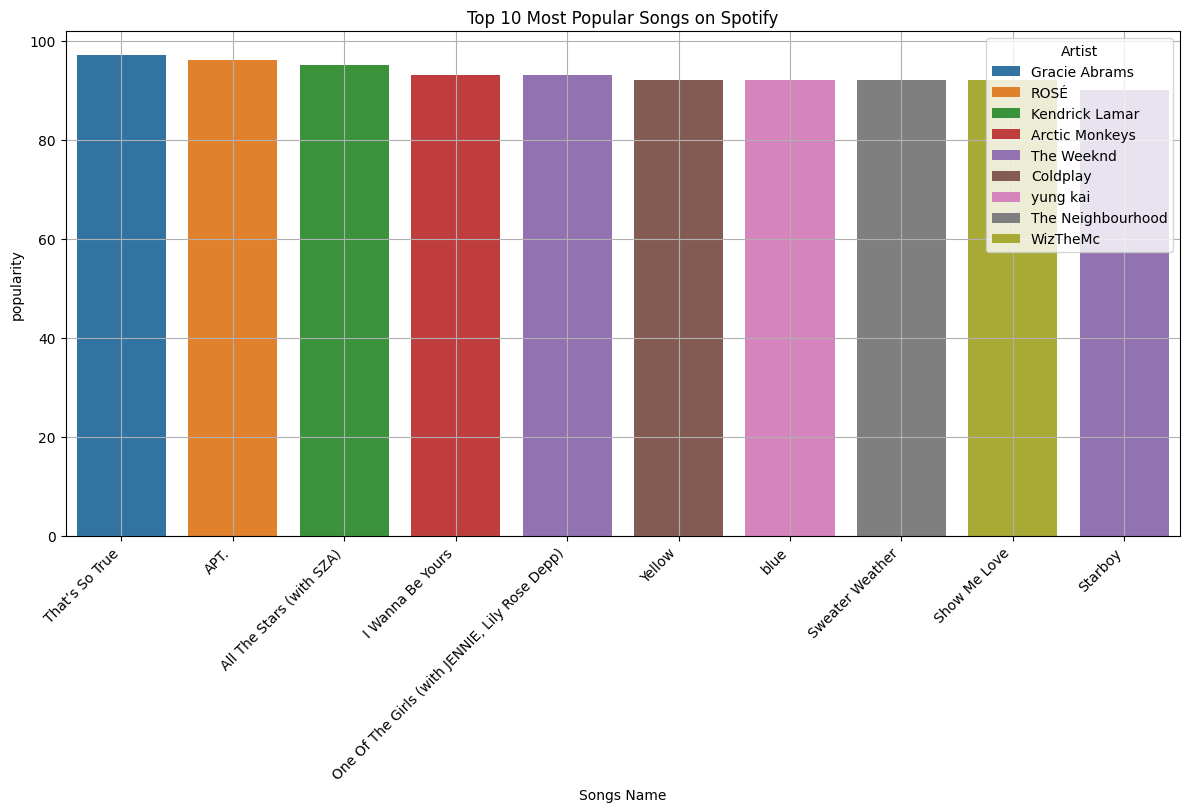

In [107]:
#Visualization
# Top 10 Most Popular Songs

plt.figure(figsize=(12,6))
sns.barplot(data=top_songs, x= "track_name",y="popularity",hue="artist")
plt.title('Top 10 Most Popular Songs on Spotify')
plt.xlabel("Songs Name")
plt.ylabel("popularity")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45, ha="right")  # Rotates labels by 45 degrees
plt.legend(title='Artist')
plt.show()


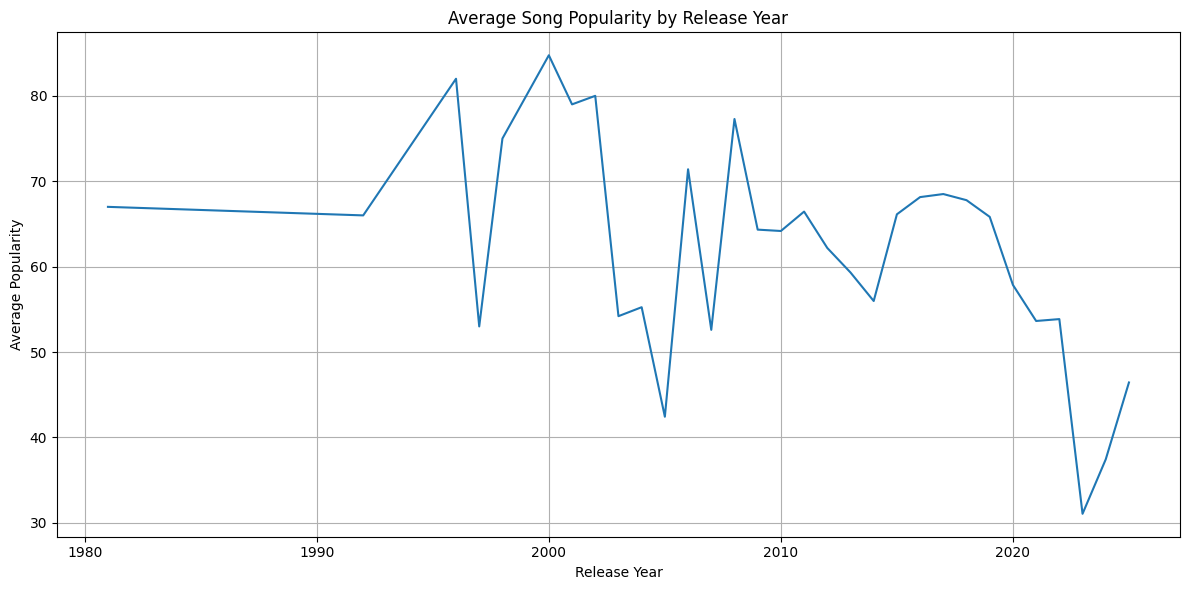

In [109]:
# Visualization 2: Popularity by Release Year
yearly_popularity = df.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_popularity, x='release_year', y='popularity')
plt.title('Average Song Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


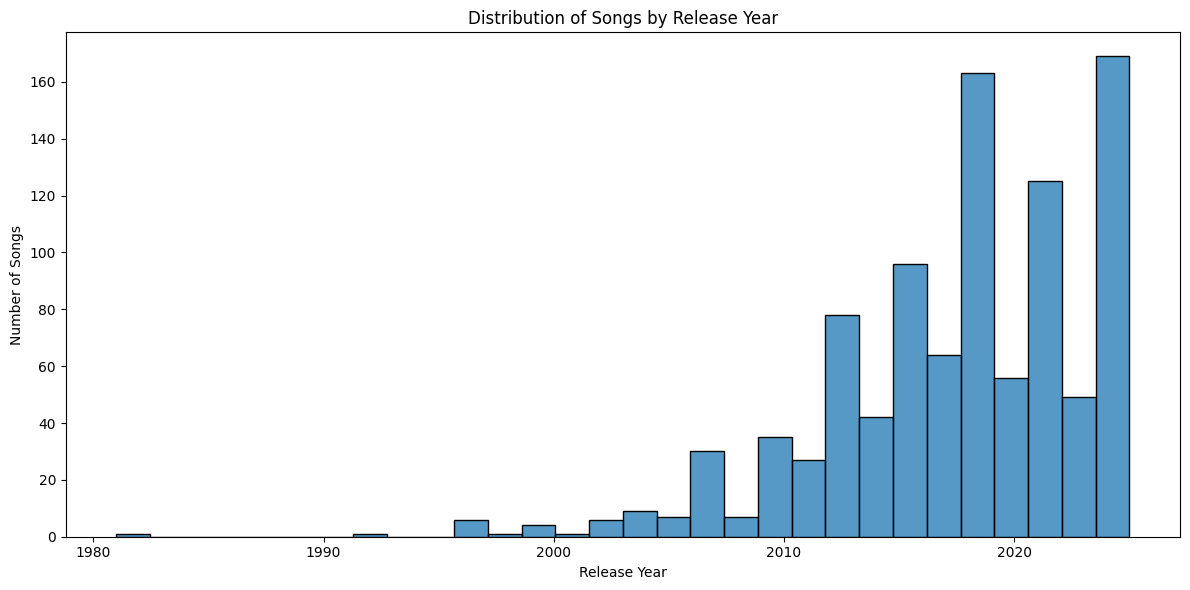

In [110]:
# Visualization 3: Distribution of Songs by Year
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=30)
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()


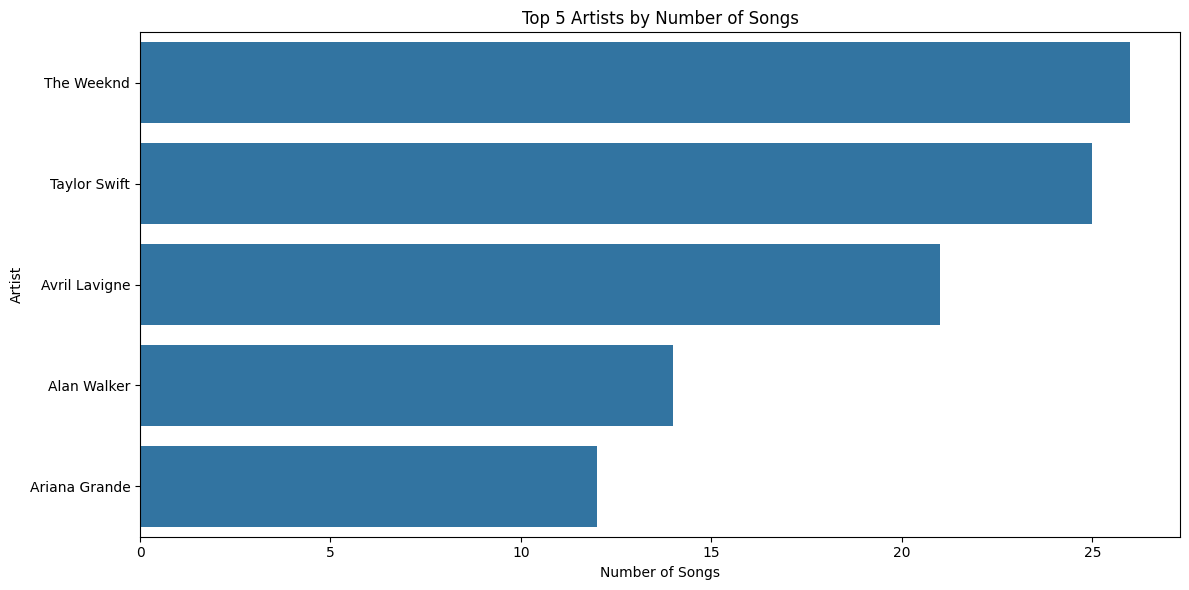

In [112]:

# Visualization 4: Top Artists by Number of Songs
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_song_count.values, y=artist_song_count.index)
plt.title('Top 5 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

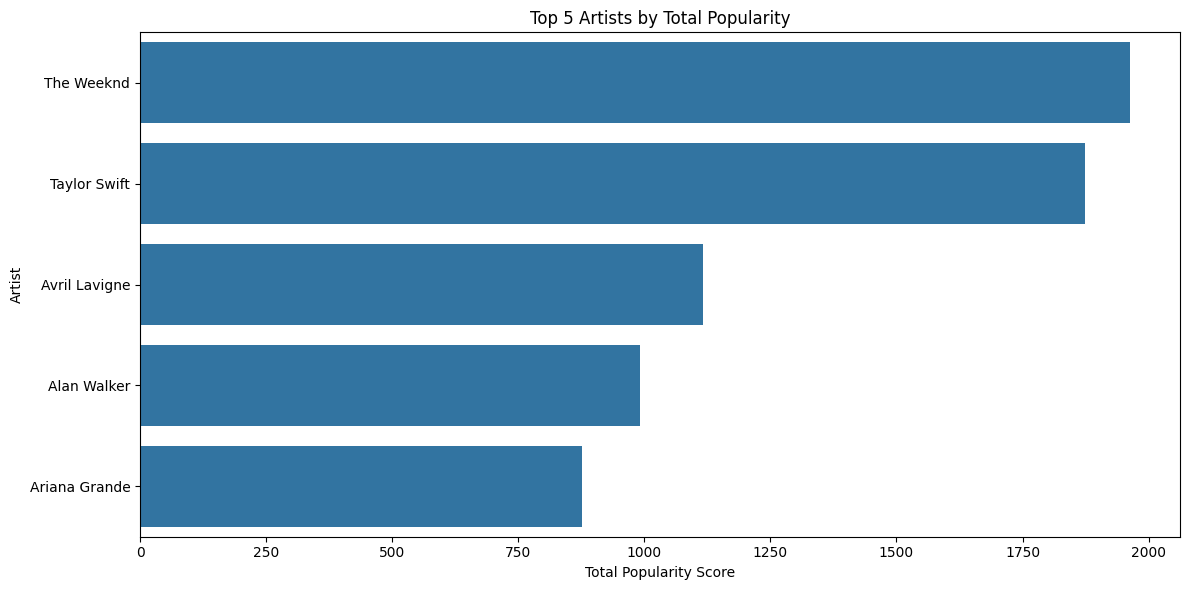

In [113]:
# Visualization 5: Top Artists by Total Popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index)
plt.title('Top 5 Artists by Total Popularity')
plt.xlabel('Total Popularity Score')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [124]:
recent_released = df[df["release_year"] >= 2020]
print(recent_released.head(5))  # Displays first 5 rows



                             track_name         artist  \
3                            Heat Waves  Glass Animals   
14                      Blinding Lights     The Weeknd   
15  Jalebi Baby (Tesher x Jason Derulo)         Tesher   
24                      Save Your Tears     The Weeknd   
37                          After Hours     The Weeknd   

                                  album release_date  popularity  \
3                             Dreamland   2020-08-07          87   
14                      Blinding Lights   2020-09-11          63   
15  Jalebi Baby (Tesher x Jason Derulo)   2021-05-28          68   
24                          After Hours   2020-03-20          87   
37                          After Hours   2020-03-20          83   

                                              spotify_url  \
3   https://open.spotify.com/track/3USxtqRwSYz57Ewm6wWRMp   
14  https://open.spotify.com/track/6qYkmqFsXbj8CQjAdbYz07   
15  https://open.spotify.com/track/6FvSS3Goz7OC8oCC2eWqe8  

In [ ]:
# Deapth Insightsś
recent_songs = df[df['release_year'] >= 2020]
recent_high_pop = recent_songs[recent_songs['popularity'] >= 80].shape[0]
total_recent = recent_songs.shape[0]
print(f"\nInteresting Fact: {recent_high_pop} out of {total_recent} songs released since 2020 have a popularity score of 80 or higher, showing a strong trend of recent hits dominating Spotify's top charts.")


Interesting Fact: 60 out of 399 songs released since 2020 have a popularity score of 80 or higher, showing a strong trend of recent hits dominating Spotify's top charts.
